# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [8]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [9]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [10]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [12]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.082403161 W= 0.29091212 b= 0.50422406
Epoch: 0100 cost= 0.081775106 W= 0.2884548 b= 0.52190155
Epoch: 0150 cost= 0.081219681 W= 0.2861436 b= 0.5385286
Epoch: 0200 cost= 0.080728516 W= 0.28396976 b= 0.55416733
Epoch: 0250 cost= 0.080294281 W= 0.28192508 b= 0.568876
Epoch: 0300 cost= 0.079910286 W= 0.28000197 b= 0.5827104
Epoch: 0350 cost= 0.079570755 W= 0.27819335 b= 0.5957219
Epoch: 0400 cost= 0.079270557 W= 0.27649212 b= 0.6079604
Epoch: 0450 cost= 0.079005189 W= 0.27489242 b= 0.6194691
Epoch: 0500 cost= 0.078770623 W= 0.27338794 b= 0.6302919
Epoch: 0550 cost= 0.078563243 W= 0.27197295 b= 0.6404713
Epoch: 0600 cost= 0.078379929 W= 0.27064195 b= 0.65004575
Epoch: 0650 cost= 0.078217827 W= 0.26939017 b= 0.65905124
Epoch: 0700 cost= 0.078074560 W= 0.2682129 b= 0.6675208
Epoch: 0750 cost= 0.077947922 W= 0.26710552 b= 0.6754868
Epoch: 0800 cost= 0.077836022 W= 0.2660641 b= 0.68297863
Epoch: 0850 cost= 0.077737093 W= 0.2650846 b= 0.69002545
Epoch: 0900 cost= 0.077649660 

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


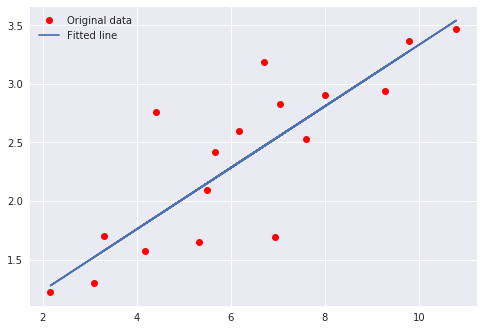

In [15]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [16]:
# Regression result